In [1]:
import pandas as pd
import psycopg2

conn = psycopg2.connect(
    dbname="avocado_beyond",
    user="postgres",
    password="King",
    host="localhost",
    port="5432"
)

query = "SELECT * FROM avocado_sales"
df = pd.read_sql(query, conn)
df.head()


C:\Users\prime\AppData\Local\Temp\ipykernel_3700\1373847483.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,date,averageprice,totalvolume,plu4046,plu4225,plu4770,totalbags,smallbags,largebags,xlargebags,type,year,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-11,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany
3,2015-01-11,1.77,1182.56,39.00,305.12,0.00,838.44,838.44,0.00,0.0,organic,2015,Albany
4,2015-01-18,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,conventional,2015,Albany


Matplotlib is building the font cache; this may take a moment.


<Axes: title={'center': 'Average Avocado Price Over Time'}, xlabel='date'>

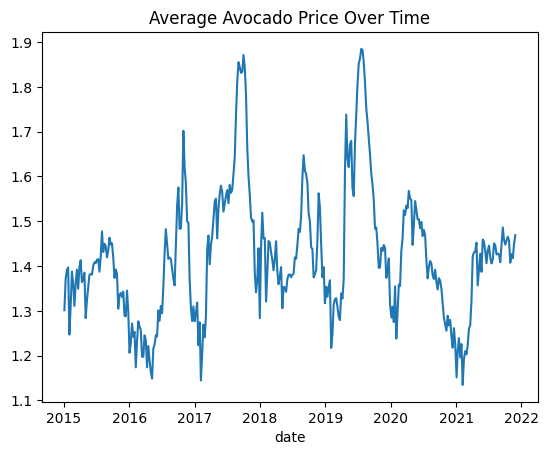

In [3]:
#What is the average price trend of avocados over time?

avg_price_trend = df.groupby('date')['averageprice'].mean()
avg_price_trend.plot(title='Average Avocado Price Over Time')


<Axes: title={'center': 'Average Price by Region'}, ylabel='region'>

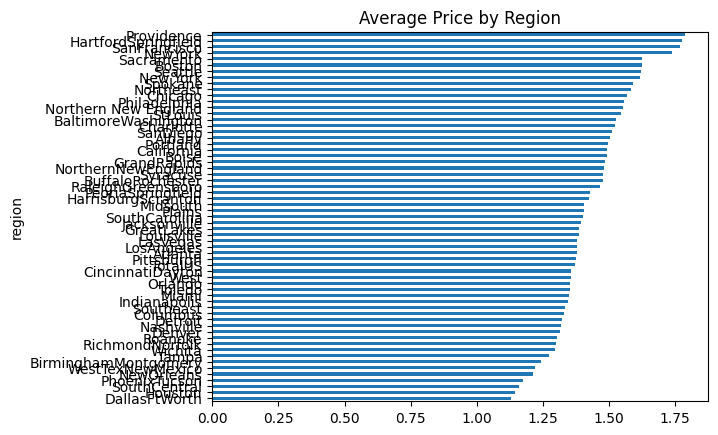

In [4]:
#How do prices vary across different regions?

import seaborn as sns
region_prices = df.groupby('region')['averageprice'].mean().sort_values()
region_prices.plot(kind='barh', title='Average Price by Region')


<Axes: title={'center': 'Average Price by Avocado Type'}, xlabel='type'>

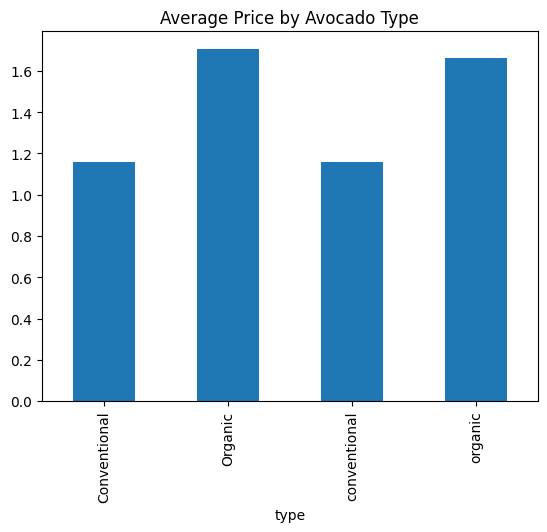

In [5]:
#Which type (conventional or organic) is generally more expensive?

df.groupby('type')['averageprice'].mean().plot(kind='bar', title='Average Price by Avocado Type')

<Axes: title={'center': 'Total Avocado Volume Sold by Region'}, xlabel='region'>

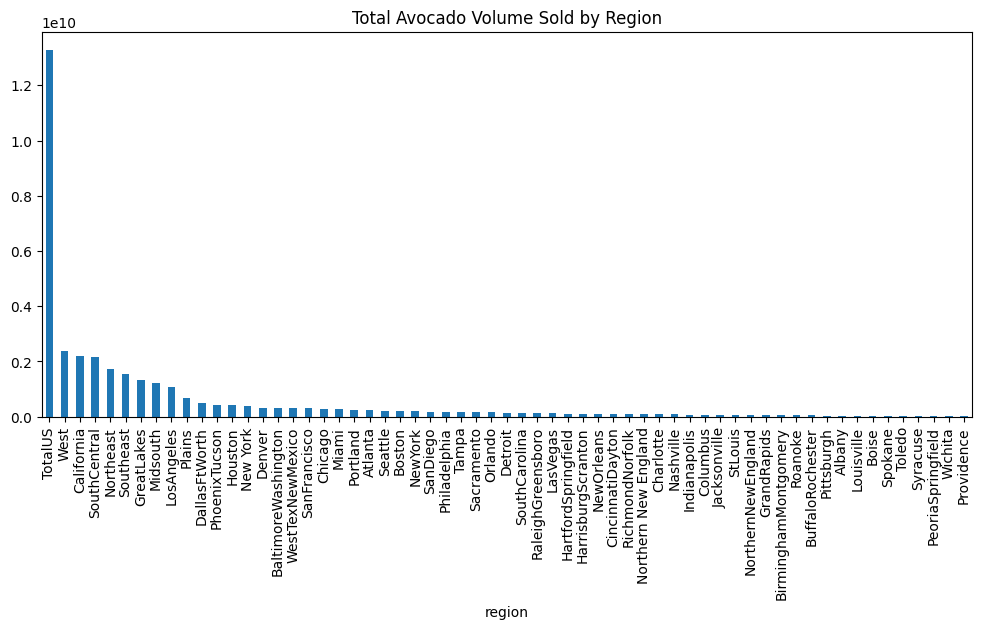

In [6]:
#Which regions consume the most avocados?


region_volume = df.groupby('region')['totalvolume'].sum().sort_values(ascending=False)
region_volume.plot(kind='bar', title='Total Avocado Volume Sold by Region', figsize=(12,5))



<Axes: title={'center': 'Average Price by Month'}, xlabel='month'>

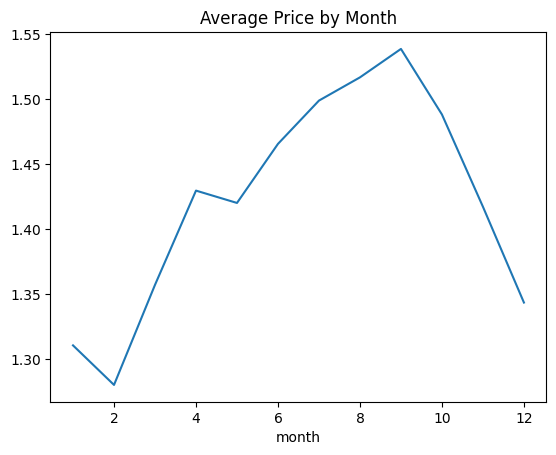

In [7]:
#Are there seasonal patterns in avocado sales or prices?

df['month'] = pd.to_datetime(df['date']).dt.month
seasonal_prices = df.groupby('month')['averageprice'].mean()
seasonal_prices.plot(title='Average Price by Month')


-0.18613084125439627


<Axes: xlabel='averageprice', ylabel='totalvolume'>

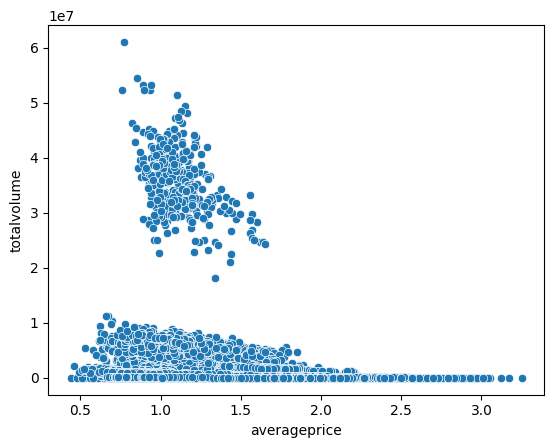

In [8]:
#What is the correlation between price and volume?

print(df['averageprice'].corr(df['totalvolume']))
sns.scatterplot(data=df, x='averageprice', y='totalvolume')


<Axes: title={'center': 'Total Avocado Sales per Year'}, xlabel='year'>

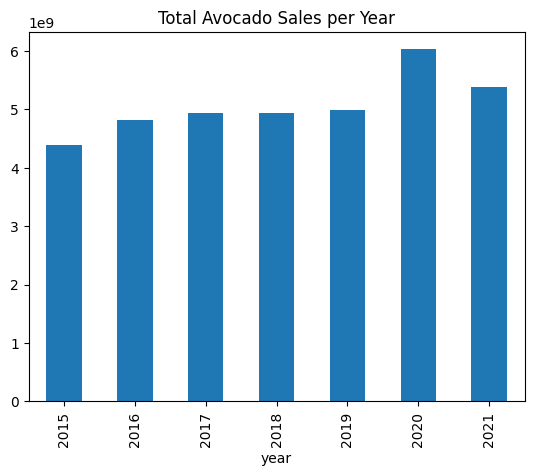

In [9]:
#How does avocado sales differ across years?

df['year'] = pd.to_datetime(df['date']).dt.year
yearly_volume = df.groupby('year')['totalvolume'].sum()
yearly_volume.plot(kind='bar', title='Total Avocado Sales per Year')


<Axes: title={'center': 'Total Sales by Packaging Size'}>

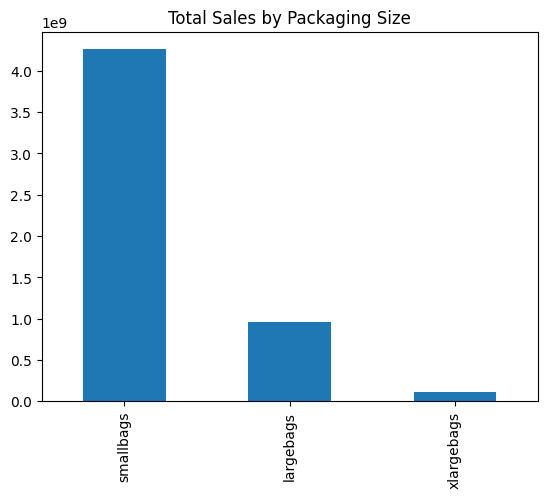

In [10]:
#What packaging size is most sold (small, large, XL bags)?

sizes = df[['smallbags', 'largebags', 'xlargebags']].sum()
sizes.plot(kind='bar', title='Total Sales by Packaging Size')


<Axes: title={'center': 'Total Volume Sold by PLU'}>

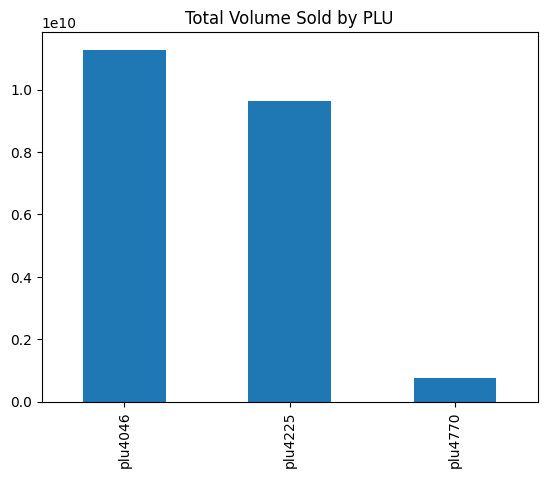

In [12]:
#Which PLU (product lookup code) contributes most to the total volume sold?

plu_volume = df[['plu4046', 'plu4225', 'plu4770']].sum()
plu_volume.plot(kind='bar', title='Total Volume Sold by PLU')


<Axes: title={'center': 'Sales by Region and Type'}, xlabel='region'>

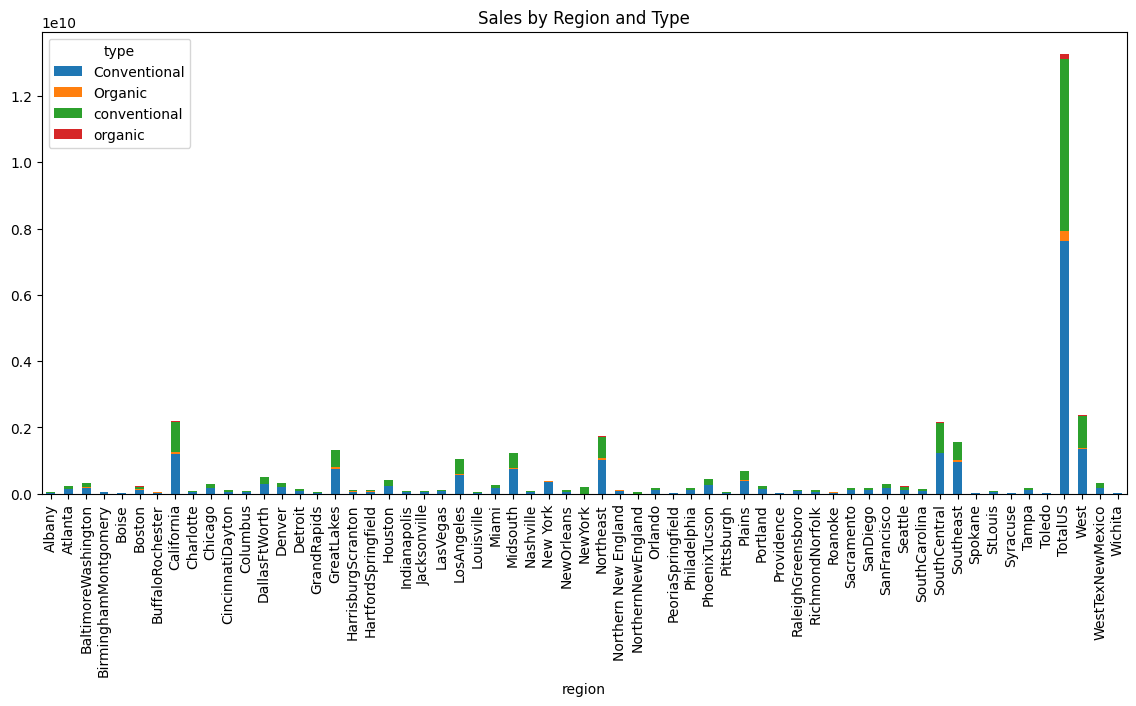

In [13]:
#How do organic and conventional avocados sell in different regions?

sales_by_region_type = df.groupby(['region', 'type'])['totalvolume'].sum().unstack()
sales_by_region_type.plot(kind='bar', stacked=True, figsize=(14,6), title='Sales by Region and Type')


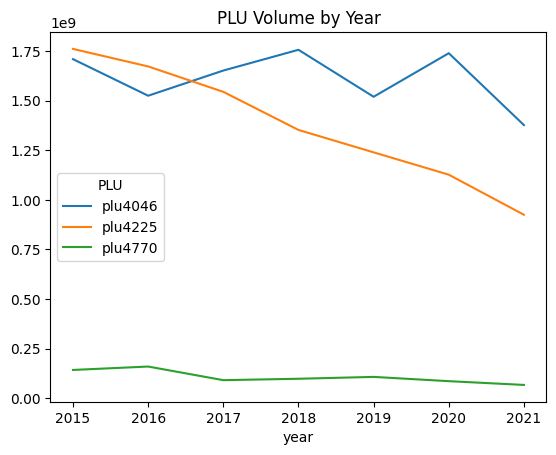

In [14]:
#Which PLU contributes most to total volume per year or region?

plu_data = df[['date', 'region', 'plu4046', 'plu4225', 'plu4770']].copy()
plu_data['year'] = pd.to_datetime(plu_data['date']).dt.year
melted = pd.melt(plu_data, id_vars=['year', 'region'], value_vars=['plu4046', 'plu4225', 'plu4770'], var_name='PLU', value_name='volume')
top_plu_by_year = melted.groupby(['year', 'PLU'])['volume'].sum().unstack().plot(title='PLU Volume by Year')


<Axes: title={'center': 'Price Trend Over Time by Region'}, xlabel='date'>

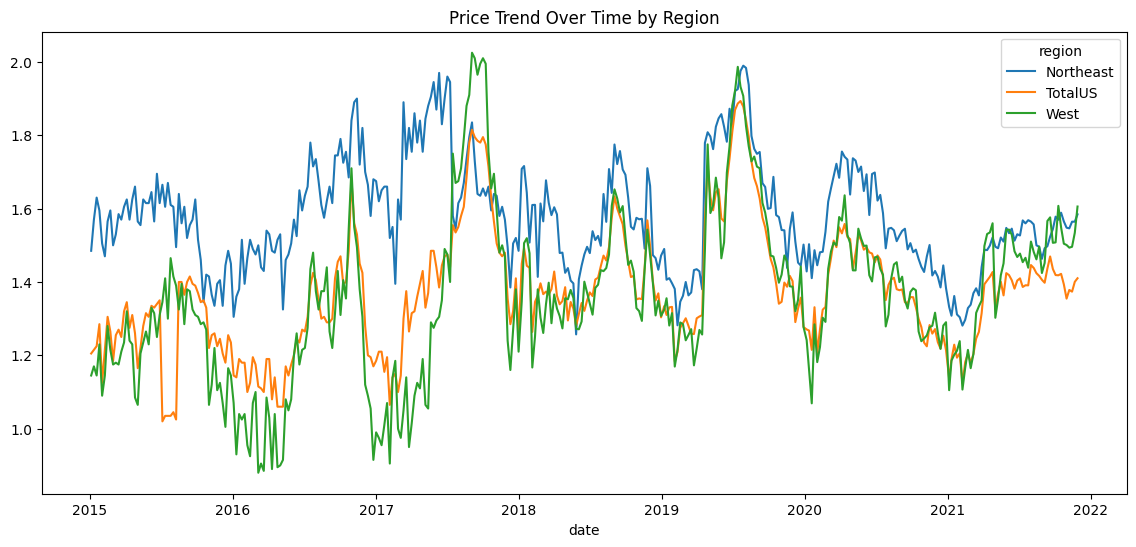

In [16]:
#How do average prices compare between regions over time?

selected_regions = ['TotalUS', 'West', 'Northeast']
subset = df[df['region'].isin(selected_regions)]
region_price_trend = subset.groupby(['date', 'region'])['averageprice'].mean().unstack()
region_price_trend.plot(figsize=(14,6), title='Price Trend Over Time by Region')


In [ ]:
#Can we forecast avocado prices for the next few months?

# Prepare the time series data
df['date'] = pd.to_datetime(df['date'])
ts = df[df['region'] == 'TotalUS'].groupby('date')['AveragePrice'].mean()

# Use statsmodels to forecast
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(ts, order=(1,1,1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=12)  # Forecast next 12 time points

# Plot
ts.plot(label='Historical')
forecast.plot(label='Forecast', legend=True, title='Avocado Price Forecast')
